In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
# from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import wordnet
# from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

In [3]:
apps = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\apps.tsv', delimiter='\t', encoding='utf-8')
user_history = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\user_history.tsv', delimiter='\t', encoding='utf-8')
jobs = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\jobs.tsv', delimiter='\t', encoding='utf-8', error_bad_lines=False)
users = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\users.tsv', delimiter='\t', encoding='utf-8')
test_users = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\test_users.tsv', delimiter='\t', encoding='utf-8')
popular_jobs = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\popular_jobs.csv')
window_dates = pd.read_csv(r'C:\Users\mailg\OneDrive\Documents\GitHub\Data-Hackfest\Dataset\window_dates.tsv', delimiter='\t', encoding='utf-8')

Skipping line 122433: expected 11 fields, saw 12

Skipping line 602576: expected 11 fields, saw 12

Skipping line 990950: expected 11 fields, saw 12



In [4]:
# Check the shape and info of each dataset
dataset_info = {
    "Apps Data": (apps.shape, apps.info()),
    "User History Data": (user_history.shape, user_history.info()),
    "Jobs Data": (jobs.shape, jobs.info()),
    "Users Data": (users.shape, users.info()),
    "Test Users Data": (test_users.shape, test_users.info()),
    "Popular Jobs Data": (popular_jobs.shape, popular_jobs.info()),
    "Window Dates Data": (window_dates.shape, window_dates.info())
}

for name, info in dataset_info.items():
    print(f"{name} Shape: {info[0]}")
    print(f"{name} Info: {info[1]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603111 entries, 0 to 1603110
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   UserID           1603111 non-null  int64 
 1   WindowID         1603111 non-null  int64 
 2   Split            1603111 non-null  object
 3   ApplicationDate  1603111 non-null  object
 4   JobID            1603111 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 61.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753901 entries, 0 to 1753900
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   UserID    int64 
 1   WindowID  int64 
 2   Split     object
 3   Sequence  int64 
 4   JobTitle  object
dtypes: int64(3), object(2)
memory usage: 66.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091923 entries, 0 to 1091922
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        -------------- 

In [5]:
# Check for missing values
missing_values = {
    "Apps Data": apps.isnull().sum(),
    "User History Data": user_history.isnull().sum(),
    "Jobs Data": jobs.isnull().sum(),
    "Users Data": users.isnull().sum(),
    "Test Users Data": test_users.isnull().sum(),
    "Popular Jobs Data": popular_jobs.isnull().sum(),
    "Window Dates Data": window_dates.isnull().sum()
}

for name, missing in missing_values.items():
    print(f"Missing values in {name}:\n{missing}\n")


Missing values in Apps Data:
UserID             0
WindowID           0
Split              0
ApplicationDate    0
JobID              0
dtype: int64

Missing values in User History Data:
UserID           0
WindowID         0
Split            0
Sequence         0
JobTitle    100635
dtype: int64

Missing values in Jobs Data:
JobID                0
WindowID             0
Title                7
Description         10
Requirements     41402
City                 2
State                1
Country              3
Zip5            406199
StartDate            0
EndDate              9
dtype: int64

Missing values in Users Data:
UserID                       0
WindowID                     0
Split                        0
City                         0
State                      490
Country                      0
ZipCode                   1734
DegreeType                   0
Major                    97240
GraduationDate          120231
WorkHistoryCount             0
TotalYearsExperience     14180
Currentl

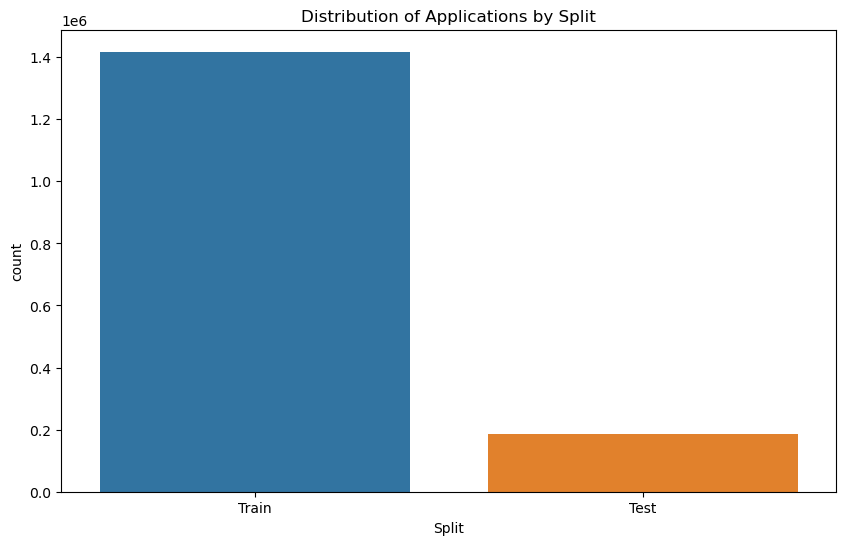

In [6]:
# Plot the distribution of applications
plt.figure(figsize=(10, 6))
sns.countplot(data=apps, x='Split')
plt.title('Distribution of Applications by Split')
plt.show()


In [10]:
# Print column names for each dataframe
dataframes = {
    "Apps": apps,
    "User History": user_history,
    "Jobs": jobs,
    "Users": users,
    "Test Users": test_users,
    "Popular Jobs": popular_jobs,
    "Window Dates": window_dates
}

for name, df in dataframes.items():
    print(f"{name} DataFrame Columns:\n{df.columns.tolist()}\n")

Apps DataFrame Columns:
['UserID', 'WindowID', 'Split', 'ApplicationDate', 'JobID']

User History DataFrame Columns:
['UserID', 'WindowID', 'Split', 'Sequence', 'JobTitle']

Jobs DataFrame Columns:
['JobID', 'WindowID', 'Title', 'Description', 'Requirements', 'City', 'State', 'Country', 'Zip5', 'StartDate', 'EndDate']

Users DataFrame Columns:
['UserID', 'WindowID', 'Split', 'City', 'State', 'Country', 'ZipCode', 'DegreeType', 'Major', 'GraduationDate', 'WorkHistoryCount', 'TotalYearsExperience', 'CurrentlyEmployed', 'ManagedOthers', 'ManagedHowMany']

Test Users DataFrame Columns:
['UserID', 'WindowID']

Popular Jobs DataFrame Columns:
['UserId', ' JobIds']

Window Dates DataFrame Columns:
['Window', 'Train Start', 'Train End / Test Start', 'Test End']

